In [2]:
import pandas as pd
import numpy as np
import os
import nltk
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from itertools import chain

In [3]:
word_df = pd.read_csv('pre_contest/dataset/word_label_df.txt',sep='\t')
word_df.shape

(14421, 3)

In [4]:
word_df.head()

,Unnamed: 0,log,label
0,0,management subsys health system_health | sens...,1
1,1,memory cpu1d0_dimm_stat | correctable ecc | a...,2
2,2,processor cpu0_status | configuration error |...,1
3,3,processor cpu0_status | configuration error |...,2
4,4,drive slot hdd_l_14_status | drive fault | de...,3


## word based

In [5]:
word_lists = [word_tokenize(word_df['log'].iloc[ith].strip()) for ith in range(len(word_df))]
plain_list = [xx.lower() for xx in list(chain(*word_lists))]
unique_list = list(set(plain_list))

In [9]:
word_lists

[['management',
  'subsys',
  'health',
  'system_health',
  '|',
  'sensor',
  'access',
  'degraded',
  'or',
  'unavailable',
  '|',
  'deasserted',
  '.',
  'system',
  'boot',
  'initiated',
  'bios_boot_up',
  '|',
  'initiated',
  'by',
  'warm',
  'reset',
  '|',
  'asserted',
  '.',
  'processor',
  'cpu1_status',
  '|',
  'ierr',
  '|',
  'asserted',
  '.',
  'system',
  'acpi',
  'power',
  'state',
  'acpi_pwr_status',
  '|',
  's4/s5',
  ':',
  'soft-off',
  '|',
  'asserted',
  '.',
  'system',
  'acpi',
  'power',
  'state',
  'acpi_pwr_status',
  '|',
  's0/g0',
  ':',
  'working',
  '|',
  'asserted',
  '.',
  'management',
  'subsys',
  'health',
  'system_health',
  '|',
  'sensor',
  'access',
  'degraded',
  'or',
  'unavailable',
  '|',
  'asserted',
  '.',
  'processor',
  'cpu0_status',
  '|',
  'ierr',
  '|',
  'deasserted',
  '.',
  'processor',
  'cpu0_status',
  '|',
  'ierr',
  '|',
  'asserted',
  '.',
  'processor',
  'cpu1_status',
  '|',
  'ierr',
  '|'

In [6]:
len(unique_list)

1808

In [7]:
freq_out = []
for rth in range(len(unique_list)):
    if rth % 100 == 0:
        print(rth)
    query_word = unique_list[rth]
    freq_vector = [sum(np.array([item.lower() for item in word_lists[xth]]) == query_word) for xth in range(len(word_lists))]
    freq_out.append(freq_vector)

0
100


KeyboardInterrupt: 

In [8]:
freq_out

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [56]:
freq_df.to_csv('pre_contest/dataset/freq_df.tsv', sep='\t', index=None)

In [208]:
# fisher exact test for all words against all error types
from scipy.stats import fisher_exact

#key_words = []
for rth in range(len(unique_list)):
    query_word = unique_list[rth]

    pos_df = freq_df[[query_word, 'label']].loc[freq_df[query_word] > 0].groupby(['label']).count()
    neg_df = freq_df[[query_word, 'label']].loc[freq_df[query_word] == 0].groupby(['label']).count()
    
    for query_label in list(set(neg_df.index.tolist()).intersection(pos_df.index.tolist())):
        TP, TF, FP, FF = pos_df[query_word].loc[query_label], neg_df[query_word].loc[query_label], \
                                pos_df[query_word].loc[pos_df.index != query_label].sum(), \
                                neg_df[query_word].loc[neg_df.index != query_label].sum()
        value, p = fisher_exact([[TP, TF],[FP, FF]])

        if p <= 0.001:
            #key_words.append(query_word)
            print(query_word, query_label, value, p)
            #break

# 1 1.1928397791630507 1.8320146665634187e-05
# 2 1.172246151286308 2.0678683166928746e-06
# 3 0.6018234355678855 3.1730024007872376e-27
& 0 5.185143418446021 4.2052701648143336e-45
& 1 2.726201650436075 1.4277229647531689e-21
& 2 0.11151304853723404 3.3209605384528765e-75
( 0 0.0893382044175695 3.0341904004764704e-07
( 1 0.1984860067099843 5.114267408555153e-10
( 2 3.5810374253321955 3.662596639625581e-15
) 0 0.0893382044175695 3.0341904004764704e-07
) 1 0.1984860067099843 5.114267408555153e-10
) 2 3.5810374253321955 3.662596639625581e-15
, 2 0.18562994086098134 6.102098891954266e-21
, 3 6.786656835574992 8.5978042438623e-31
- 0 0.6004049968519152 3.571838866441764e-09
- 3 1.8162649286885535 1.3958258280223857e-23
-12 0 13.39248793935217 3.0981146701349236e-06
-120 0 35.604395604395606 0.0004810691536218441
-124 0 11.131443298969073 0.0009385987711233708
-125 0 22.266323024054984 0.00018626063864982703
-126 0 11.131443298969073 0.0009385987711233708
-128 0 14.84306987399771 0.00045513

58 2 0.08618012422360248 1.2080318950713022e-07
58 3 5.21971846063266 7.708895671437562e-06
61 2 0.08217658909857124 8.248876378430342e-06
61 3 8.624848484848485 8.027413761273536e-07
62 3 14.802547770700636 2.681387748160139e-09
64 0 35.604395604395606 0.0004810691536218441
65 3 9.70375 3.6597219092870105e-07
66 3 9.245111414279219 1.9483282739245367e-07
69 3 14.413993639254883 1.0201345789712884e-07
70 3 14.802547770700636 2.681387748160139e-09
71 0 44.5360824742268 5.809067812153768e-05
72 0 20.091833218470022 5.347155921449149e-07
73 2 0.04314359637774903 4.498443074539352e-06
73 3 9.006531122217174 1.5348903579169235e-06
74 3 12.940454545454546 6.023892640121427e-08
76 0 35.604395604395606 0.0004810691536218441
77 2 0.04795170332039672 1.752664753305988e-05
77 3 9.497859089139743 2.9152233793282357e-06
78 2 0.04314359637774903 4.498443074539352e-06
78 3 9.006531122217174 1.5348903579169235e-06
8 1 0.055814160782022205 1.5661179537051662e-11
8 2 39.017767833640434 2.662872133678845

correctable 2 24.15129323730574 0.0
correctable 3 0.015074487368301802 0.0
cpu 1 0.027897824311279424 9.346716469137704e-13
cpu 2 117.98420429116757 2.877845972045113e-35
cpu0 0 3.330694413403197 2.2500303526874068e-30
cpu0 1 12.184748383204179 5.552865024543828e-185
cpu0 2 0.005050149869106407 1.880308536425328e-206
cpu0 3 0.008373791233619522 8.113984226099e-45
cpu0_margin_temp 0 10.0375 2.5389494494193344e-22
cpu0_margin_temp 2 0.12915572432394065 1.1392705106693218e-14
cpu0_proc_hot 0 8.90990371389271 0.0005746196557554398
cpu0_status 0 4.105683017122275 2.010735490668434e-116
cpu0_status 1 4.02356748788875 2.5829685877560216e-180
cpu0_status 2 0.27719272691806457 3.4962046302696926e-171
cpu0_status 3 0.17854759067925713 1.1559746147091086e-89
cpu0_vr_temp 3 inf 0.0005542836847985191
cpu0a0_dimm_stat 0 0.34182192932498034 6.942692899126939e-06
cpu0a0_dimm_stat 1 0.3744643926864849 1.1937837886175143e-09
cpu0a0_dimm_stat 2 5.8902493106839175 3.4303477389132113e-43
cpu0a0_dimm_stat 3

ecc 0 0.18647967223447842 1.6562088039882532e-168
ecc 1 0.0657172880409594 0.0
ecc 2 97.31843139224554 0.0
ecc 3 0.008678026776770644 0.0
ef 0 7.6364708194144235 0.0009759946840068058
enabled 2 0.5346698797410794 2.1218881196202498e-16
enabled 3 2.13725324939446 8.889687082256634e-17
error 0 2.5844601558410965 2.338402458029838e-52
error 1 2.937892307601154 2.1554266077733567e-112
error 2 0.5162882796325055 1.8677060230007156e-53
error 3 0.15856701527321737 3.5975083833827964e-106
event 0 1.3786629195052007 2.977057652980187e-06
event 1 1.8667496917880304 2.2376219149914865e-35
event 2 0.3730263522109874 2.1136324179228837e-108
event 3 1.894748954079841 2.183842376552187e-30
eventlog 3 33.16847826086956 7.917213733474165e-05
exception 0 6.559650710646286 2.9781393814951063e-77
exception 1 2.010734145821627 3.4780403141604186e-13
exception 2 0.18723999300821534 1.1953995137879336e-66
exception 3 0.47779102819616426 3.658218896344346e-07
failure 0 0.45280519197390595 1.72025084643226e-05

hdd_l_10_status 3 22.13055303717135 1.0259419327212989e-05
hdd_l_11_status 3 22.13055303717135 1.0259419327212989e-05
hdd_l_12_status 3 16.58288043478261 0.00027523839224096315
hdd_l_13_status 3 24.908163265306122 1.911802609748795e-06
hdd_l_14_status 3 27.688294010889294 3.4989909157382513e-07
hdd_l_15_status 3 16.58288043478261 0.00027523839224096315
hdd_l_16_status 3 19.35545990031717 5.386522069231743e-05
hdd_l_17_status 3 24.908163265306122 1.911802609748795e-06
hdd_l_18_status 3 22.13055303717135 1.0259419327212989e-05
hdd_l_19_status 3 38.71409152695967 1.3816719032114414e-05
hdd_l_1_status 3 27.688294010889294 3.4989909157382513e-07
hdd_l_21_status 3 38.71409152695967 1.3816719032114414e-05
hdd_l_22_status 3 33.16847826086956 7.917213733474165e-05
hdd_l_23_status 3 33.16847826086956 7.917213733474165e-05
hdd_l_24_status 3 38.71409152695967 1.3816719032114414e-05
hdd_l_25_status 3 33.16847826086956 7.917213733474165e-05
hdd_l_27_status 3 27.627885921231325 0.00044470262925136727

mem_chh0_status 2 21.76799895846895 1.0253958260662296e-11
mem_chh1_status 2 inf 0.0003464713718636574
memory 0 0.16363123303251811 7.540880739224858e-201
memory 1 0.06353172713290631 0.0
memory 2 352.30333584621184 0.0
memory 3 0.015417326251063526 0.0
memory_status 0 0.1875730280575646 1.5289957620855433e-07
memory_status 1 0.026078535737817158 2.481897678232735e-26
memory_status 2 31.03893882479206 2.789047628584351e-64
met 0 62.43633860977288 7.849942304314388e-07
microcontroller 0 1.7132706750011242 3.1748253576149753e-12
microcontroller 1 3.7900862698116318 1.7372802158130874e-126
microcontroller 2 0.1985788807939375 3.876045207491897e-183
microcontroller 3 1.289219443706599 0.0002221980125427134
microcontroller/coprocessor 1 2.033113439852254 3.255703186497164e-18
microcontroller/coprocessor 2 0.31421978355757546 4.2551028184129956e-51
microcontroller/coprocessor 3 2.2649960463400785 1.426585632094935e-20
moc_fpga_temp 0 9.924904214559387 4.299331966270248e-06
moc_fpga_temp 2 0.

soft-off 0 2.4432433807152907 1.8546713047326415e-50
soft-off 1 3.525018460800209 5.177525985677205e-172
soft-off 2 0.21853251774482083 1.2722008311830474e-289
specified 0 0.6004049968519152 3.571838866441764e-09
specified 3 1.8162649286885535 1.3958258280223857e-23
sps 0 9.924904214559387 4.299331966270248e-06
sps 2 0.04795170332039672 1.752664753305988e-05
sta 0 23.7979797979798 1.3513393295835489e-06
state 0 2.8327516471414 4.162158266458913e-77
state 1 3.9679666554580293 1.0357970667310505e-234
state 2 0.21076586520559604 0.0
state 3 1.22127793879211 3.4662177185700764e-05
status 1 2.5956024280612873 3.0175638688934996e-43
status 2 0.24320528302850336 1.8542275120515386e-95
status 3 2.17298442977093 9.262390728059009e-24
stop 0 0.033092096519049194 3.2819478321988485e-11
stop 1 0.32207588779653334 1.0609184254765539e-08
stop 3 3.4736483835983107 2.2881036405261064e-19
stop/shutdown 0 0.029124940774917084 8.347301518529194e-13
stop/shutdown 1 0.22358634911400727 1.3855459278958207e-

In [142]:
freq_df_filt = freq_df[key_words + ['label']]
freq_df_filt.shape

(14421, 600)

In [141]:
query_word = key_words[200]

pos_df = freq_df[[query_word, 'label']].loc[freq_df[query_word] > 0].groupby(['label']).count()
neg_df = freq_df[[query_word, 'label']].loc[freq_df[query_word] == 0].groupby(['label']).count()

query_word, pos_df, neg_df

('cpu1_margin_temp',        cpu1_margin_temp
 label                  
 0                    53
 1                    31
 2                    13
 3                    23,        cpu1_margin_temp
 label                  
 0                  1407
 1                  2985
 2                  7718
 3                  2191)

In [162]:
from sklearn.decomposition import PCA

X = (freq_df[key_words] > 0).to_numpy() * 1
pca = PCA(n_components=10)
newX = pca.fit_transform(X)

In [178]:
pca.explained_variance_ratio_

array([0.21368444, 0.09938944, 0.06790192, 0.05352788, 0.04423175,
       0.03583366, 0.03254028, 0.02964275, 0.027876  , 0.02584484])

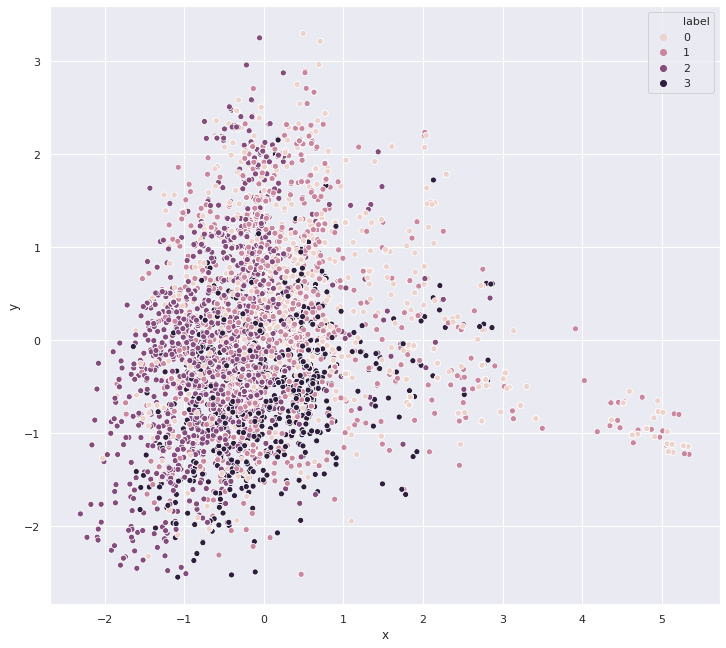

In [180]:
plot_df_tot = pd.DataFrame({'x': newX[:,2], 'y': newX[:,3], 'label': freq_df['label']})
sns.set(rc={"figure.figsize":(12, 11)}) #width=8, height=4
sns.scatterplot(plot_df_tot['x'], plot_df_tot['y'], hue = plot_df_tot['label'])

In [196]:
import random
val_mask = [random.random() < 0.2 for _ in range(len(X))]
train_mask = [not xx for xx in val_mask]
val_feature = X[val_mask]
val_label = freq_df['label'].to_numpy()[val_mask]

train_feat = X[train_mask]
train_lab = freq_df['label'].to_numpy()[train_mask]

In [197]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(train_feat, train_lab)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [198]:
train_label_pred = rf.predict(X)

In [199]:
train_pred = train_label_pred[train_mask]
train_true = freq_df['label'].to_numpy()[train_mask]

val_pred = train_label_pred[val_mask]
val_true = freq_df['label'].to_numpy()[val_mask]

In [205]:
def macro_f1(train_pred, train_true):
    weights =  [3  /  7,  2  /  7,  1  /  7,  1  /  7]
    macro_F1 =  0.
    for i in  range(len(weights)):
        TP =  sum((train_pred == i) & (train_true == i))
        FP =  sum((train_pred != i) & (train_true == i))
        FN =  sum((train_pred == i) & (train_true != i))
        precision = TP /  (TP + FP)  if  (TP + FP)  >  0  else  0
        recall = TP /  (TP + FN)  if  (TP + FN)  >  0  else  0
        F1 =  2  * precision * recall /  (precision + recall)  if  (precision + recall)  >  0  else  0
        macro_F1 += weights[i]  * F1

        print('Task %d:\n Prcesion %.2f, Recall %.2f, F1 %.2f' % (i+1, precision, recall, F1))
    return macro_F1

In [206]:
macro_f1(train_pred, train_true)

Task 1:
 Prcesion 0.54, Recall 0.89, F1 0.67
Task 2:
 Prcesion 0.94, Recall 0.81, F1 0.87
Task 3:
 Prcesion 0.98, Recall 0.98, F1 0.98
Task 4:
 Prcesion 0.97, Recall 0.94, F1 0.95


0.8142407466830712

In [207]:
macro_f1(val_pred, val_true)

Task 1:
 Prcesion 0.24, Recall 0.47, F1 0.32
Task 2:
 Prcesion 0.80, Recall 0.73, F1 0.77
Task 3:
 Prcesion 0.97, Recall 0.93, F1 0.95
Task 4:
 Prcesion 0.91, Recall 0.88, F1 0.90


0.6178826635154157

## tag based

In [78]:
tag_lists = [word_df['log'].iloc[ith].strip().replace(';','|').split('|') for ith in range(len(word_df))]
plain_tags = [xx.lower().strip() for xx in list(chain(*tag_lists))]
unique_tags = list(set(plain_tags))

In [82]:
unique_tags.sort()

In [83]:
unique_tags

['',
 '(cpu1))',
 '.',
 '. button button_pressed',
 '. critical interrupt #0xe1',
 '. critical interrupt pcie_status',
 '. fan fan1_rpm',
 '. fan fan2_rpm',
 '. fan fan3_rpm',
 '. fan fan4_rpm',
 '. fan fan6_rpm',
 '. fan fan7_rpm',
 '. management subsys health #0x8f',
 '. memory #0xe2',
 '. memory #0xf9',
 '. memory cpu1e0_dimm_stat',
 '. microcontroller #0x16',
 '. microcontroller #0x3b',
 '. microcontroller bmc_boot_up',
 '. microcontroller/coprocessor #0x16',
 '. microcontroller/coprocessor #0x3b',
 '. microcontroller/coprocessor bmc_boot_up',
 '. oem cpu0 caterr',
 '. oem cpu0 mcerr',
 '. os boot #0xe9',
 '. power supply power_drop',
 '. power supply ps1_status',
 '. power supply ps2_status',
 '. power unit pwr unit status',
 '. processor',
 '. processor #0x1c',
 '. processor #0xfa',
 '. processor cpu0 thermal sta',
 '. processor cpu0_status',
 '. processor cpu1 thermal sta',
 '. processor cpu_caterr',
 '. system acpi power state acpi_pwr_status',
 '. system boot initiated',
 '. s